In [6]:
import numpy as np
import scipy as sp
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

# Scikit-Learn의 PCA기능


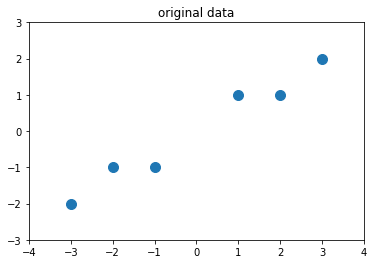

In [7]:
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
plt.scatter(X[:,0], X[:,1], s=100)
plt.xlim(-4,4)
plt.ylim(-3,3)
plt.title("original data")
plt.show()

In [9]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
Z = pca.transform(X)
Z

array([[ 1.38340578,  0.2935787 ],
       [ 2.22189802, -0.25133484],
       [ 3.6053038 ,  0.04224385],
       [-1.38340578, -0.2935787 ],
       [-2.22189802,  0.25133484],
       [-3.6053038 , -0.04224385]])

In [23]:
w, V = np.linalg.eig(pca.get_covariance())
print('w= {}'.format(w), '\n',
      'V={}'.format(V))

w= [7.93954312 0.06045688] 
 V=[[ 0.83849224 -0.54491354]
 [ 0.54491354  0.83849224]]


In [24]:
V.T.dot(X.T).T

array([[-1.38340578, -0.2935787 ],
       [-2.22189802,  0.25133484],
       [-3.6053038 , -0.04224385],
       [ 1.38340578,  0.2935787 ],
       [ 2.22189802, -0.25133484],
       [ 3.6053038 ,  0.04224385]])

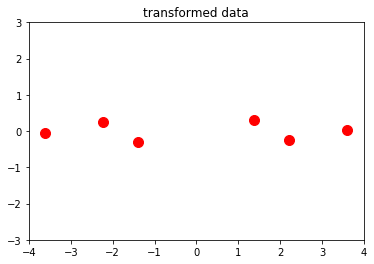

In [27]:
plt.scatter(Z[:,0], Z[:,1], c='r', s=100)
plt.xlim(-4, 4)
plt.ylim(-3, 3)
plt.title("transformed data")
plt.show()

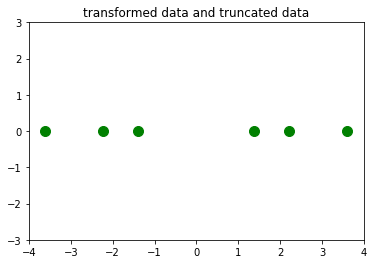

In [30]:
plt.scatter(Z[:,0], np.zeros_like(Z[:,1]), c='g', s=100)
plt.xlim(-4, 4)
plt.ylim(-3, 3)
plt.title("transformed data and truncated data")
plt.show()

In [33]:
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA

wine = fetch_mldata("wine")
X, y = wine.data, wine.target

In [36]:
import seaborn as sns

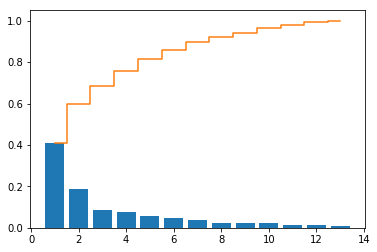

In [37]:
pca = PCA().fit(X)
var = pca.explained_variance_
# print(var)
cmap = sns.color_palette()
plt.bar(np.arange(1,len(var)+1), var/np.sum(var), align="center", color=cmap[0])
plt.step(np.arange(1,len(var)+1), np.cumsum(var)/np.sum(var), where="mid", color=cmap[1])
plt.show()
